# Introdução
A princípio será feito uma análise exploratória do dataset utilizado, após isso em outro arquivo será realizado um Machine Learning com os dados

# 1. Dataset
O dataset utilizado será o arquivo .csv neste repositório. O arquivo foi originado do site de competições e datasets de Machine Learning, Kaggle.  

[Link para o dataset](https://www.kaggle.com/datasets/khushikyad001/electric-vehicle-analytics-dataset)

O dataset contém informações sobre a performance de carros elétricos de variadas marcas. O dataset foi feito de forma sintética para representação de dados reais.

## a) Utilizar a API do Kaggle

In [ ]:
# Parte para baixar o arquivo utilizando a API do Kaggle
import kagglehub

# Baixando o arquivo
caminho = kagglehub.dataset_download("khushikyad001/electric-vehicle-analytics-dataset")

print("Caminho para o dataset:", caminho)

## b) Utilizar arquivo .csv já baixado

In [2]:
# Parte para utilizar o arquivo já baixado
import os

# Começando o caminho vazio
caminho = None

# Procurando o arquivo no diretório atual
arquivos = os.listdir(".")
for arquivo in arquivos:
    if arquivo == "electric_vehicle_analytics.csv":
        caminho = os.path.join(".",arquivo)
        break

if caminho:
    print("Caminho para o dataset:", caminho)
else:
    print("Dataset não encontrado!")

Caminho para o dataset: .\electric_vehicle_analytics.csv


# 2. Carregando o dataset e começando a análise exploratória


In [3]:
import pandas as pd

# Carregando o dataset
df = pd.read_csv(caminho)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Vehicle_ID                        3000 non-null   int64  
 1   Make                              3000 non-null   object 
 2   Model                             3000 non-null   object 
 3   Year                              3000 non-null   int64  
 4   Region                            3000 non-null   object 
 5   Vehicle_Type                      3000 non-null   object 
 6   Battery_Capacity_kWh              3000 non-null   float64
 7   Battery_Health_%                  3000 non-null   float64
 8   Range_km                          3000 non-null   int64  
 9   Charging_Power_kW                 3000 non-null   float64
 10  Charging_Time_hr                  3000 non-null   float64
 11  Charge_Cycles                     3000 non-null   int64  
 12  Energy

In [ ]:
# Retirando a variável de ID, por não ser útil para a IA
df = df.drop(columns="Vehicle_ID")

df.head(5)

,Make,Model,Year,Region,Vehicle_Type,Battery_Capacity_kWh,Battery_Health_%,Range_km,Charging_Power_kW,Charging_Time_hr,...,Max_Speed_kmh,Acceleration_0_100_kmh_sec,Temperature_C,Usage_Type,CO2_Saved_tons,Maintenance_Cost_USD,Insurance_Cost_USD,Electricity_Cost_USD_per_kWh,Monthly_Charging_Cost_USD,Resale_Value_USD
0,Nissan,Leaf,2021,Asia,SUV,101.7,75.5,565,153.6,0.82,...,233,8.10,-9.0,Personal,14.13,969,843,0.30,375.55,26483
1,Nissan,Leaf,2020,Australia,Sedan,30.1,99.8,157,157.2,0.27,...,221,9.83,1.6,Personal,19.41,1157,1186,0.25,532.02,11287
2,Hyundai,Kona Electric,2021,North America,SUV,118.5,84.0,677,173.6,0.84,...,138,3.60,1.5,Fleet,29.39,291,1890,0.26,1291.68,34023
3,Audi,Q4 e-tron,2022,Europe,Hatchback,33.1,97.3,149,169.3,0.25,...,192,8.97,12.5,Fleet,6.96,401,2481,0.33,234.44,14398
4,Tesla,Model 3,2022,Australia,Truck,81.3,85.6,481,212.8,0.43,...,189,7.03,-3.0,Commercial,2.06,214,2336,0.10,32.61,23033


In [6]:
# Verificação de dados nulos e quantidade de dados distintos
tabela_nulos = pd.DataFrame({
    "Quantidade de valores" : [df.shape[0]] * df.shape[1],
    "Quantidade de nulos" : df.isnull().sum(),
    "Porcentagem de nulos (%)" : df.isnull().sum() / df.shape[0] * 100,
    "Valores distintos" : df.nunique()
})


tabela_nulos = tabela_nulos.sort_values("Porcentagem de nulos (%)", ascending= False)
print(tabela_nulos)

                                  Quantidade de valores  Quantidade de nulos  \
Make                                               3000                    0   
Model                                              3000                    0   
Year                                               3000                    0   
Region                                             3000                    0   
Vehicle_Type                                       3000                    0   
Battery_Capacity_kWh                               3000                    0   
Battery_Health_%                                   3000                    0   
Range_km                                           3000                    0   
Charging_Power_kW                                  3000                    0   
Charging_Time_hr                                   3000                    0   
Charge_Cycles                                      3000                    0   
Energy_Consumption_kWh_per_100km        

In [7]:
# Verificação de linhas duplicadas
linhas_dup = df.duplicated().sum()
print("Linhas duplicadas:", linhas_dup)

Linhas duplicadas: 0


In [8]:
# Separando as colunas em categóricas e numéricas
col_num = []
col_cat = []

for coluna in df.columns:
    if pd.api.types.is_numeric_dtype(df[coluna]):
        col_num.append(coluna)
    else:
        col_cat.append(coluna)

In [9]:
# Estatísticas das variáveis numéricas
if len(col_num) > 0:
    display(df[col_num].describe().T.sort_values("mean"))
else:
    print("Nenhuma coluna numérica!")

,count,mean,std,min,25%,50%,75%,max
Electricity_Cost_USD_per_kWh,3000.0,0.216467,0.078383,0.08,0.1500,0.220,0.2800,0.35
Charging_Time_hr,3000.0,1.203570,1.421866,0.14,0.4600,0.720,1.2925,12.14
Acceleration_0_100_kmh_sec,3000.0,6.707073,1.880355,3.50,5.0800,6.720,8.3100,10.00
Temperature_C,3000.0,14.794133,14.407087,-10.00,2.4000,14.550,27.5000,40.00
CO2_Saved_tons,3000.0,15.025163,8.455850,0.61,7.8175,15.115,22.1700,30.00
Energy_Consumption_kWh_per_100km,3000.0,18.589740,3.767421,12.00,15.3200,18.700,21.8300,24.99
Avg_Speed_kmh,3000.0,65.674067,20.305364,30.00,48.0000,65.600,83.5250,100.00
Battery_Capacity_kWh,3000.0,74.810100,25.734079,30.00,53.0000,74.850,96.9000,120.00
Battery_Health_%,3000.0,85.030000,8.589526,70.00,77.7750,85.250,92.3000,100.00
Charging_Power_kW,3000.0,129.301000,68.742745,11.10,70.9000,126.700,187.9750,250.00


In [10]:
# Categorias de cada variável categórica
for coluna in col_cat:
    print(df[coluna].value_counts(), "\n")

Make
Ford          323
BMW           311
Volkswagen    308
Chevrolet     308
Nissan        298
Hyundai       297
Mercedes      293
Audi          289
Tesla         287
Kia           286
Name: count, dtype: int64 

Model
Niro EV            163
Bolt EUV           163
F-150 Lightning    162
Mustang Mach-E     161
ID.3               156
Kona Electric      154
Leaf               154
ID.4               152
EQC                149
e-tron             147
Bolt EV            145
EQS                144
Ariya              144
Ioniq 5            143
Q4 e-tron          142
EV6                123
i3                 112
iX                 103
i4                  96
Model X             87
Model 3             69
Model S             67
Model Y             64
Name: count, dtype: int64 

Region
Australia        794
Asia             747
North America    740
Europe           719
Name: count, dtype: int64 

Vehicle_Type
Hatchback    773
SUV          765
Sedan        738
Truck        724
Name: count, dtype: int6

# 3. Análise gráfica
Com as variáveis separadas por categóricas e numéricas, e com cada uma delas exploradas por meio de tabelas.  
Nesta parte agora será feita uma análise gráfica dos dados.

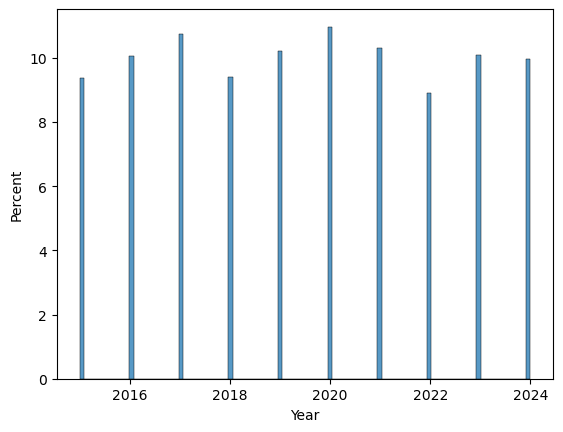

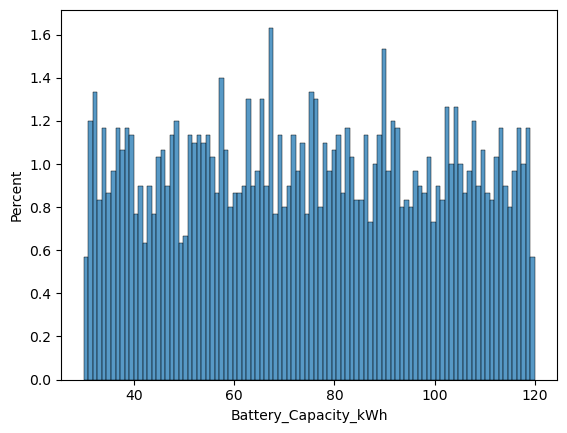

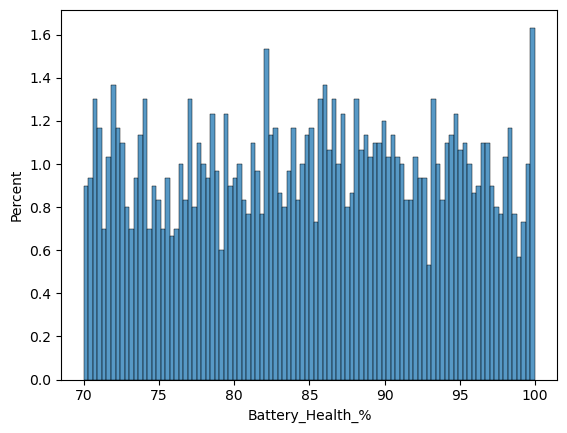

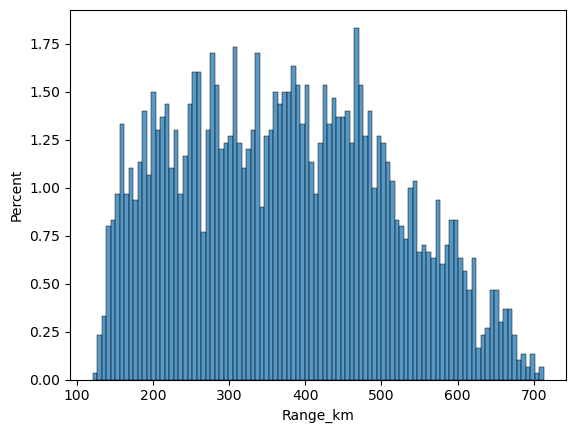

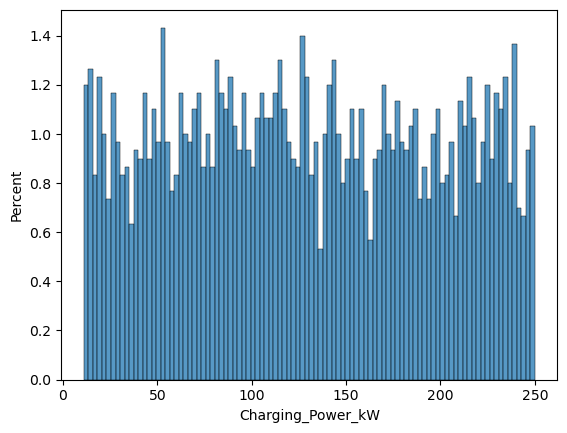

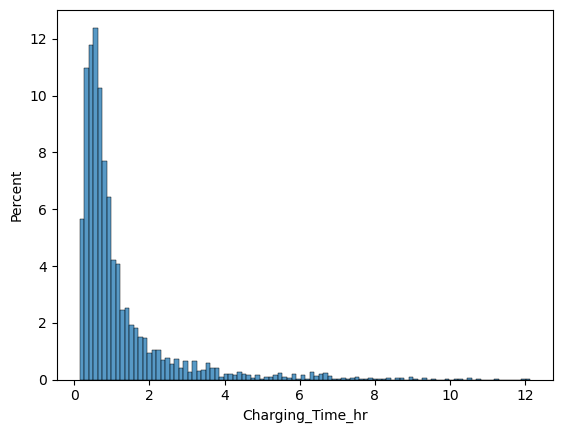

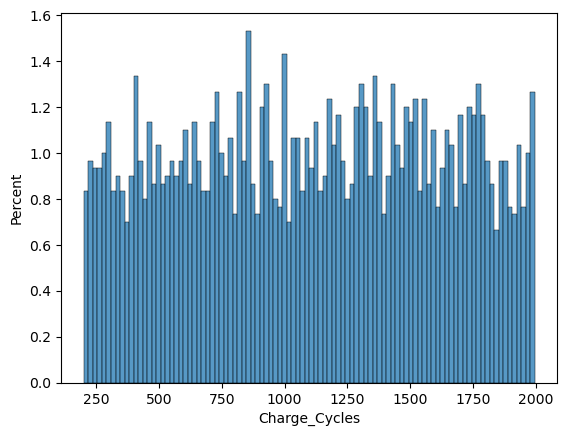

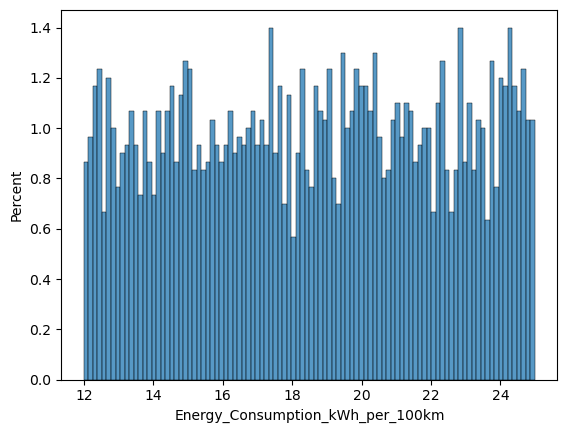

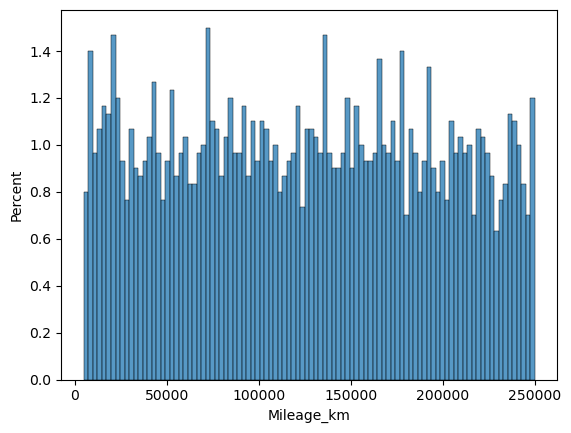

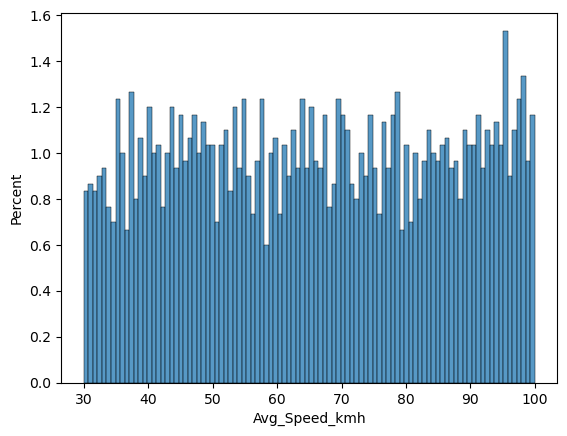

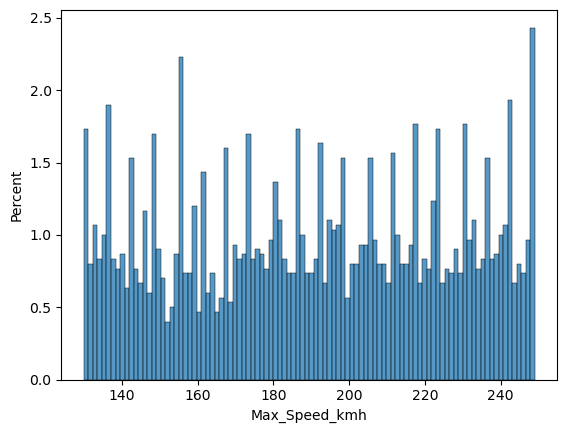

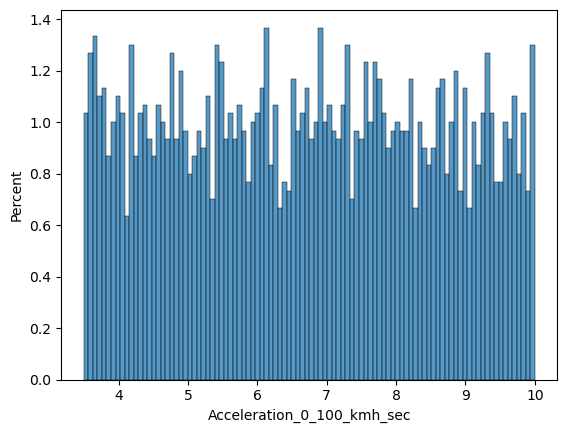

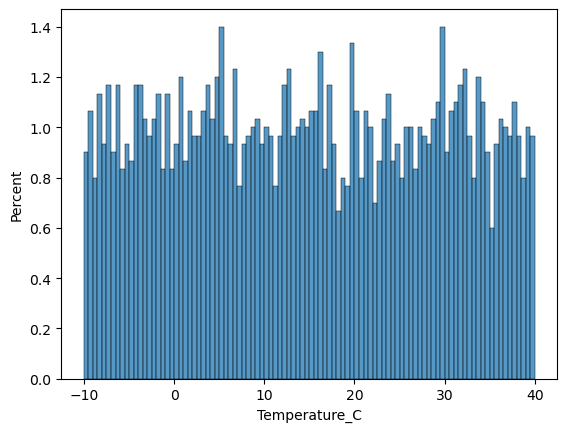

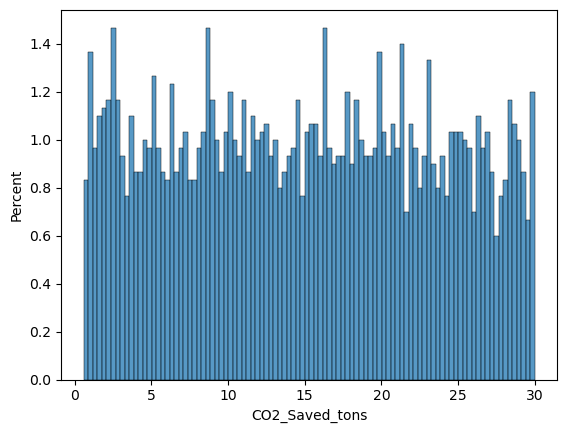

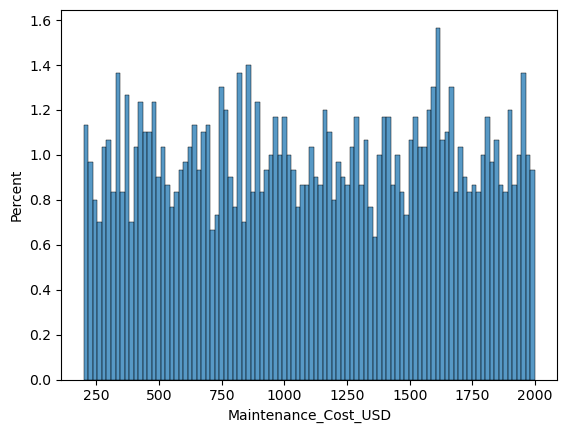

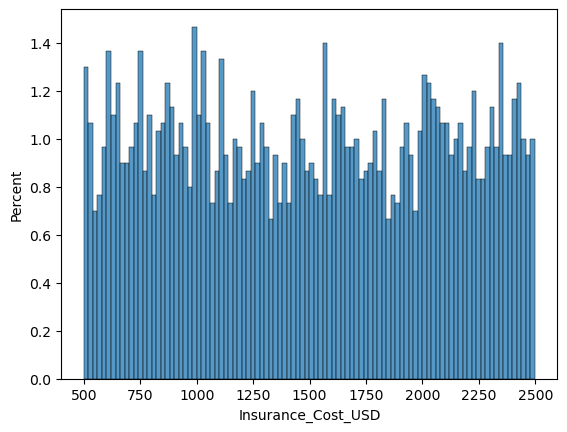

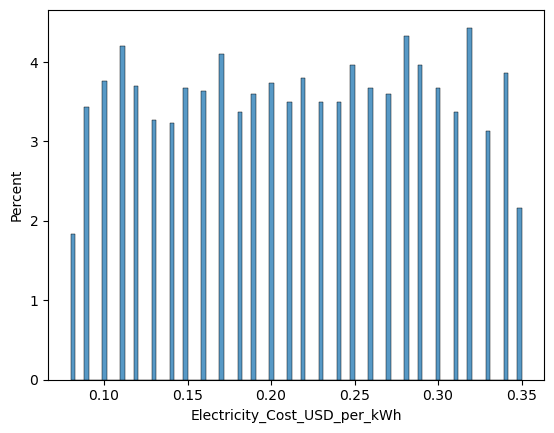

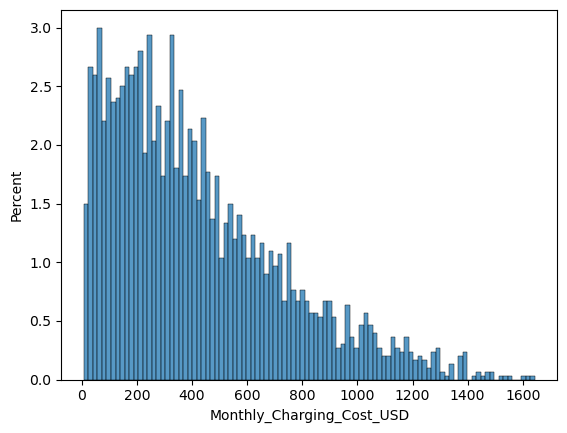

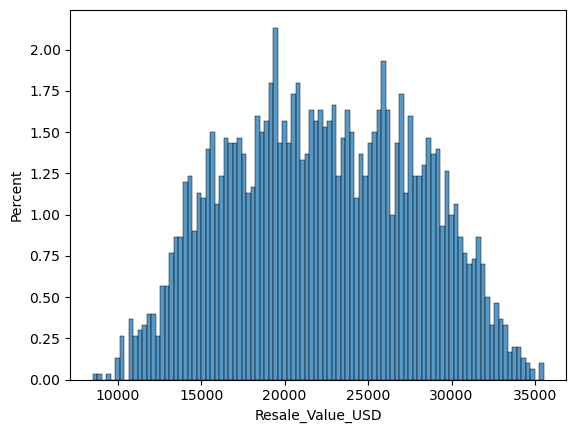

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

for coluna in col_num:
    sns.histplot(df[coluna], bins= 100, stat="percent")
    plt.show()

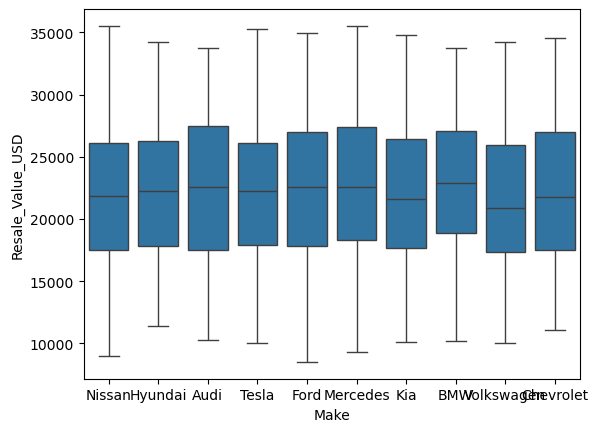

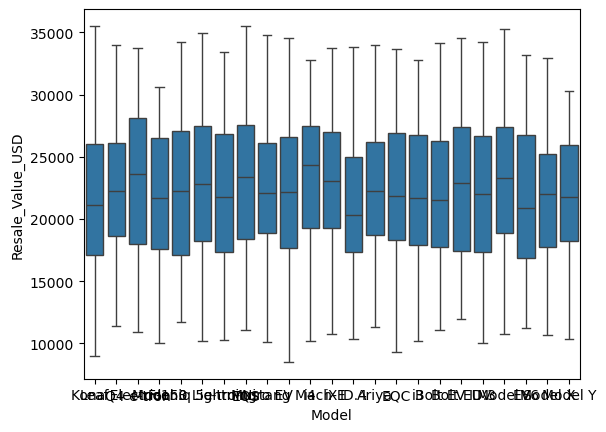

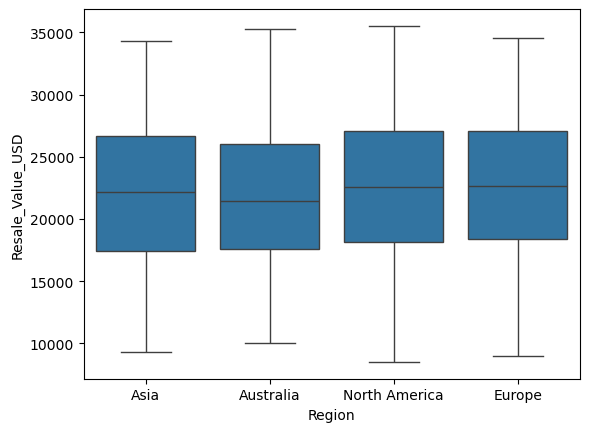

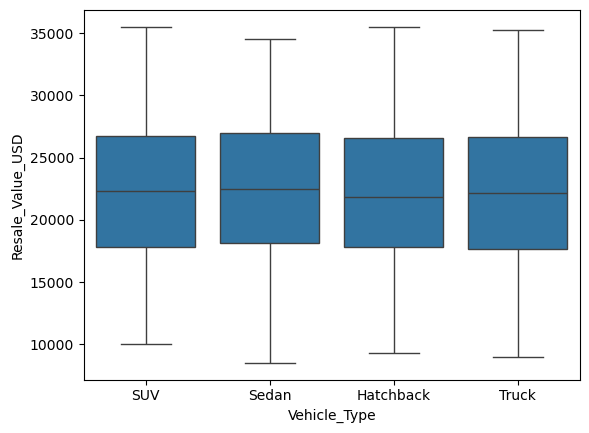

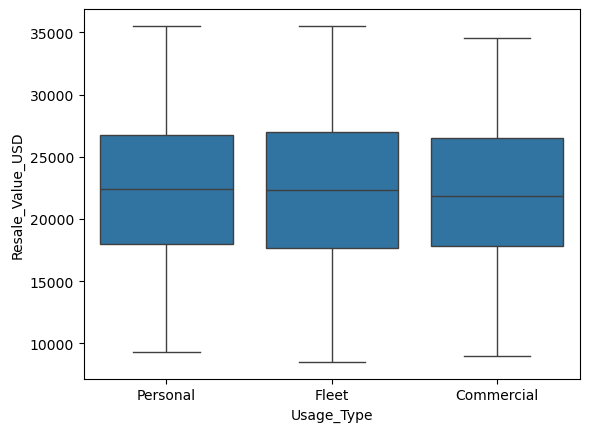

In [16]:
# Boxplot por categorias
for coluna in col_cat:
    sns.boxplot(x= coluna, y="Resale_Value_USD", data=df)
    plt.show()